In [66]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd


np.random.seed(1)

## Coin Flipping: Basic Probability with Two-Sided Dice

Here, we want to illustrate: 
- the basics of coin flipping
- how to plot histograms of the total and average number of heads, with attention to details of X and Y axis
- the difference between one random trial and many random trials
- how these plots depend on various parameters such as the number of flips and the number of random trials

We are interested in the number of times a Heads is obtained when a fair two-sided dice (a.k.a. a coin) is rolled (a.k.a. tossed) several times. While this can be computed exactly from the bionomial coefficients, we use Python to simulating the process of tossing a coin many times using. Let $1$ denote Heads and $0$ denote Tails for the remainder of this section.

By a "fair" coin, we will mean one that has a probability of $50\%$ of giving Heads.
There are a number of subtleties regarding probability that we will mostly ignore.
However, one that we want to be careful about is the following.
As a practical matter, we want a fair coin to give "about" $50\%$ Heads when it is flipped "many" times; and we want to be careful about what we mean by "about" and what we mean by "many" when we say that.

Mathematically, coin toss experiment can be thought of a Binomial experiment, where we getting head as success at each coin toss with probability p. Let's start with flipping a "fair" coin once. 

In [67]:
np.random.binomial(n=1, p=0.5)

0

Here, `n` defines how often we flip the coin, and `p` defines the probability of obtaining a success. You can run that cell multiple times. You will see that when you flip a single fair coin. 

We can also ask for the the number of heads that we will obtain if we toss the coin many times. For instance, let's toss the coin a 100 times.

In [68]:
np.random.binomial(n=100, p=0.5)

53

Since, we toss a "fair" coin we intuitively expect that we obtain about 50 heads, i.e., half of the coin flips show head.

You know that we flip a "fair" coin here, but is it really a fair coin? Let's flip the following biased coin.

In [69]:
np.random.binomial(n=100, p=0.52)

47

The result that we get does not look too suspicious, but clearly the coin is biased. You could make a lot of money with this coin on average. So it seems that flipping a coin a 100 times does not provide us with a reliable estimate for whether a coin is biased or not. So, you might want to repeat the experiment multiple times. We can easily simulate multiple experiments with the option `size` in numpy.random.binomial function.

In [74]:
fair_coin = np.random.binomial(n=100, p=0.5, size=10000)

In [75]:
another_fair_coin = np.random.binomial(n=100, p=0.5, size=10000)

In [76]:
biased_coin = np.random.binomial(n=100, p=0.52, size=10000)

We have performed ten thousand experiments (in less than a second) which three different coins. Looking at the actual values might be somewhat tedious and exactly very informative. But we can use a histogram to visualize the two distributions and see whether the distributions match or are different. First, let's plot the a single histogram for each coin next to each other.

Text(0.5, 1.0, 'biased coin, mean=51.95, ,sd=4.97')

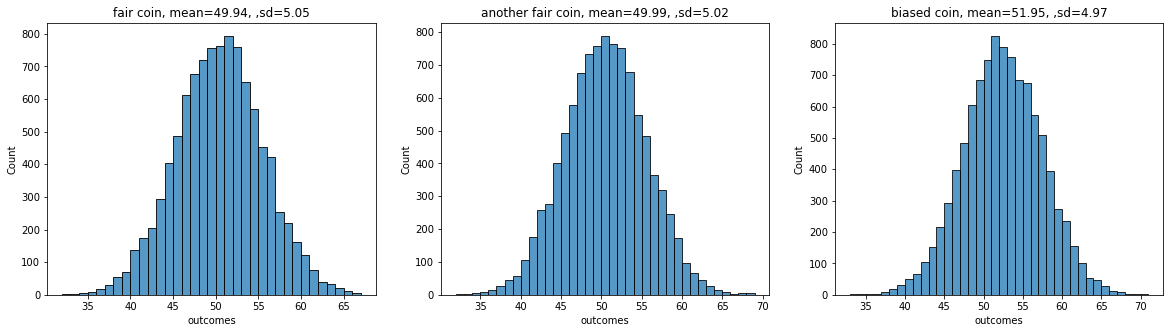

In [200]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5))

df = pd.DataFrame(data={'outcomes': fair_coin.flatten()})
sns.histplot(ax=axs[0], data=df, x="outcomes", kde=False, binwidth=1)
axs[0].set_title('fair coin, mean=%.2f, ,sd=%.2f' %(np.mean(fair_coin), np.var(fair_coin)**0.5))

df = pd.DataFrame(data={'outcomes': another_fair_coin.flatten()})
sns.histplot(ax=axs[1], data=df, x="outcomes", kde=False, binwidth=1)
axs[1].set_title('another fair coin, mean=%.2f, ,sd=%.2f' %(np.mean(another_fair_coin), np.var(another_fair_coin)**0.5))

df = pd.DataFrame(data={'outcomes': biased_coin.flatten()})
sns.histplot(ax=axs[2], data=df, x="outcomes", kde=False, binwidth=1)
axs[2].set_title('biased coin, mean=%.2f, ,sd=%.2f' %(np.mean(biased_coin), np.var(biased_coin)**0.5))

We can see that the the two fair coins are centered around 50 and that is what we expect. The biased coin is centered around 52 indicating that this is not a fair coin. To better compare the three distributions, we can also plot all three histograms in a single figure.

<AxesSubplot:xlabel='outcomes', ylabel='Density'>

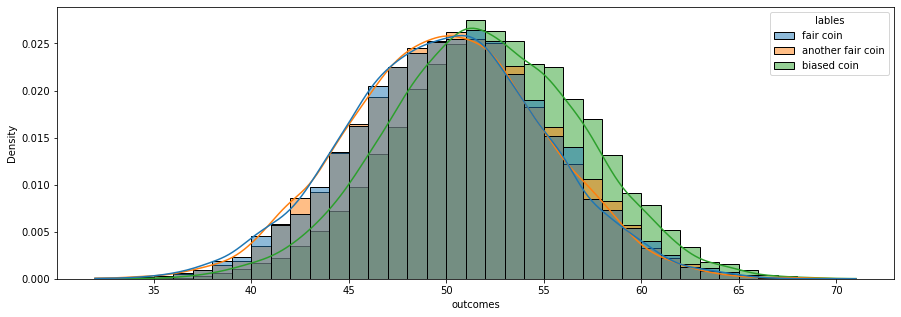

In [110]:
outcomes = np.concatenate((fair_coin.flatten(), another_fair_coin.flatten(),biased_coin.flatten()))
lables = np.concatenate((np.repeat('fair coin', 10000), np.repeat('another fair coin', 10000), np.repeat('biased coin', 10000)))
df = pd.DataFrame(data={'outcomes': outcomes, 'lables': lables})
plt.figure(figsize=(15,5))
sns.histplot(df, x="outcomes", hue="lables", kde=True, stat="density", binwidth=1)

Clearly, we can see that the distribution of the biased coin is shifted to the left, while the the distributions of the two fair coins closely match. 

### Probability of seeing x heads out of n coin tosses

In our experiment above, we flipped a far coin 100 times, and we repeated the experiment many times. Then we visualized the resuls that show how many heads we observed. In many situation, it is more convinient to normalize the results:

$$ \frac{\text{number of heads observed}}{\text{number of coin flips}}.$$

Doing so you get alwas a number between 0 and 1. For example, if we flip 100 coins and observe 50 heads then the proportion of observed heads is:

$$ 0.5 = \frac{\text{50}}{\text{100}}.$$

Now, we can use the proportions to compare the the distribution of 10 versus 100 coin flips. Intuitively, we expect to see that the mass will center more closely around 0.5 if we flip a fair coin. Let's simulate this and varify whether our intuition is right.

In [204]:
experiment1 = np.random.binomial(n=10, p=0.5, size=10) / 10
experiment2 = np.random.binomial(n=10, p=0.5, size=100) / 10 
experiment3 = np.random.binomial(n=10, p=0.5, size=1000) / 10 
experiment4 = np.random.binomial(n=10, p=0.5, size=10000) / 10

Here, we simply defined each vector by the number of total coin flips.

(0.0, 1.0)

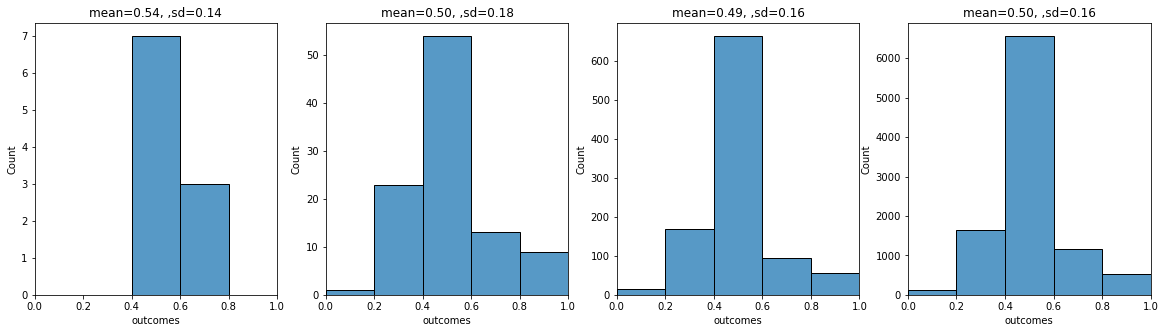

In [205]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

df = pd.DataFrame(data={'outcomes': experiment1.flatten()})
sns.histplot(ax=axs[0], data=df, x="outcomes", kde=False, binwidth=.2)
axs[0].set_title('mean=%.2f, ,sd=%.2f' %(np.mean(experiment1), np.var(experiment1)**0.5))
axs[0].set_xlim(0,1)

df = pd.DataFrame(data={'outcomes': experiment2.flatten()})
sns.histplot(ax=axs[1], data=df, x="outcomes", kde=False, binwidth=.2)
axs[1].set_title('mean=%.2f, ,sd=%.2f' %(np.mean(experiment2), np.var(experiment2)**0.5))
axs[1].set_xlim(0,1)

df = pd.DataFrame(data={'outcomes': experiment3.flatten()})
sns.histplot(ax=axs[2], data=df, x="outcomes", kde=False, binwidth=.2)
axs[2].set_title('mean=%.2f, ,sd=%.2f' %(np.mean(experiment3), np.var(experiment3)**0.5))
axs[2].set_xlim(0,1)

df = pd.DataFrame(data={'outcomes': experiment4.flatten()})
sns.histplot(ax=axs[3], data=df, x="outcomes", kde=False, binwidth=.2)
axs[3].set_title('mean=%.2f, ,sd=%.2f' %(np.mean(experiment4), np.var(experiment4)**0.5))
axs[3].set_xlim(0,1)

Now, let's repeat the same experiment with n=100.

In [206]:
experiment1 = np.random.binomial(n=100, p=0.5, size=10) / 100
experiment2 = np.random.binomial(n=100, p=0.5, size=100) / 100
experiment3 = np.random.binomial(n=100, p=0.5, size=1000) / 100
experiment4 = np.random.binomial(n=100, p=0.5, size=10000) / 100

(0.0, 1.0)

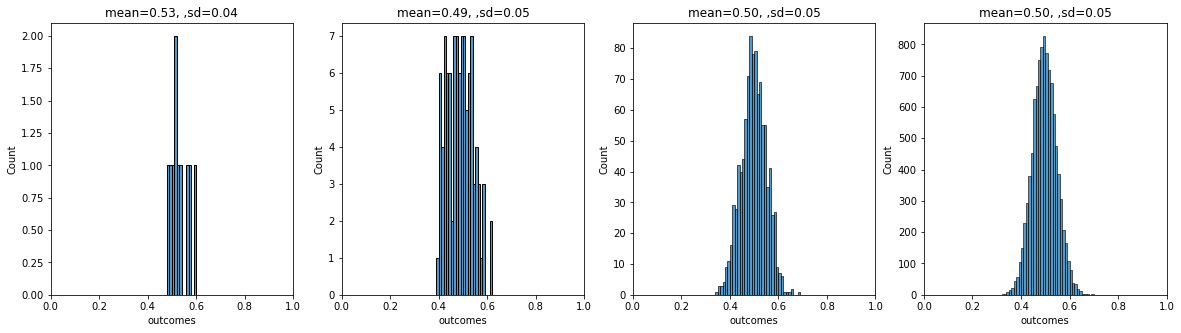

In [208]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

df = pd.DataFrame(data={'outcomes': experiment1.flatten()})
sns.histplot(ax=axs[0], data=df, x="outcomes", kde=False, binwidth=0.01)
axs[0].set_title('mean=%.2f, ,sd=%.2f' %(np.mean(experiment1), np.var(experiment1)**0.5))
axs[0].set_xlim(0,1)

df = pd.DataFrame(data={'outcomes': experiment2.flatten()})
sns.histplot(ax=axs[1], data=df, x="outcomes", kde=False, binwidth=0.01)
axs[1].set_title('mean=%.2f, ,sd=%.2f' %(np.mean(experiment2), np.var(experiment2)**0.5))
axs[1].set_xlim(0,1)

df = pd.DataFrame(data={'outcomes': experiment3.flatten()})
sns.histplot(ax=axs[2], data=df, x="outcomes", kde=False, binwidth=0.01)
axs[2].set_title('mean=%.2f, ,sd=%.2f' %(np.mean(experiment3), np.var(experiment3)**0.5))
axs[2].set_xlim(0,1)

df = pd.DataFrame(data={'outcomes': experiment4.flatten()})
sns.histplot(ax=axs[3], data=df, x="outcomes", kde=False, binwidth=0.01)
axs[3].set_title('mean=%.2f, ,sd=%.2f' %(np.mean(experiment4), np.var(experiment4)**0.5))
axs[3].set_xlim(0,1)

You should notice that the range for percentage of heads is much narrower when we flipped $100$ coins compared to when we flipped only $10$ coins. What are some other patterns you noticed in these plots? 